In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from getxy import getxy
%matplotlib inline
import functions

In [2]:
data = pd.read_csv('MasterOnlyPriceNAremoved.csv')

In [3]:
data.columns


Index(['Date', 'jci-price', 'sensex-price', 'psei-price', 'ibov-price',
       'inr-price', 'php-price', 'brl-price', 'idr-price', 'gold-price',
       'crude-price'],
      dtype='object')

In [4]:
data.corr()

,jci-price,sensex-price,psei-price,ibov-price,inr-price,php-price,brl-price,idr-price,gold-price,crude-price
jci-price,1.000000,0.936767,0.970650,0.656713,0.860300,-0.122428,0.630257,0.727539,0.711588,0.017758
sensex-price,0.936767,1.000000,0.917101,0.712025,0.842738,0.068926,0.737439,0.818715,0.505268,-0.164779
psei-price,0.970650,0.917101,1.000000,0.510060,0.898756,-0.073718,0.708683,0.787701,0.600855,-0.106348
ibov-price,0.656713,0.712025,0.510060,1.000000,0.366905,-0.127036,0.215537,0.320292,0.563491,0.225517
inr-price,0.860300,0.842738,0.898756,0.366905,1.000000,0.172368,0.857104,0.915712,0.457338,-0.291825
php-price,-0.122428,0.068926,-0.073718,-0.127036,0.172368,1.000000,0.500281,0.372543,-0.573966,-0.649077
brl-price,0.630257,0.737439,0.708683,0.215537,0.857104,0.500281,1.000000,0.937782,0.068131,-0.622947
idr-price,0.727539,0.818715,0.787701,0.320292,0.915712,0.372543,0.937782,1.000000,0.180983,-0.510334
gold-price,0.711588,0.505268,0.600855,0.563491,0.457338,-0.573966,0.068131,0.180983,1.000000,0.463761
crude-price,0.017758,-0.164779,-0.106348,0.225517,-0.291825,-0.649077,-0.622947,-0.510334,0.463761,1.000000


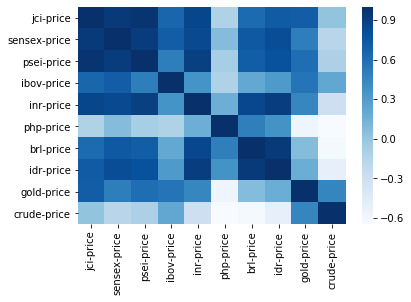

In [8]:
sns.heatmap(data.corr(),cmap="Blues")

In [4]:
col = ['Date','jci-price','psei-price','php-price','ibov-price','brl-price','idr-price','crude-price']
data.drop(col,axis=1,inplace=True)

In [5]:
data.shape
temp=[]

In [7]:
rsq=[]
rsq.append(0)
rsq.append(0)
adj = []
adj.append(0)
adj.append(0)
mse = []
mse.append(0)
mse.append(0)

for i in range(2,11):
    X,y = getxy(data,i,'sensex-price')
    #print(X.shape)
    #print(y.shape)
    
    #print(X)
    #print(y)
    print(i)
    #polynomial_features= PolynomialFeatures(degree=2)
    #x_poly = polynomial_features.fit_transform(X)
    x_poly = X
    print(x_poly.shape)
    model = LinearRegression().fit(x_poly,y)
    print(model.coef_)
    y_pred = model.predict(x_poly)
    #plt.plot(model.coef_)
    rss = r2_score(y,y_pred)
    rrr = functions.adjr2(x_poly,y,y_pred)
    mse.append(mean_squared_error(y, y_pred)/y.shape[0])
    rsq.append(rss)
    adj.append(rrr)
    
    

2
(2971, 6)
[ -0.04457634  27.37455547  -0.4709718    1.04206476 -25.03487125
   0.46395724]
3
(2970, 9)
[  0.03296485  22.70830715   0.05311814  -0.07783864   5.58538829
  -0.52774479   1.04237598 -25.94656493   0.46744613]
4
(2969, 12)
[ 7.72123681e-03  1.18047478e+01  4.72503628e-02  2.54920784e-02
  1.12127727e+01  3.36141330e-03 -7.75783337e-02  5.82964536e+00
 -5.22087194e-01  1.04185728e+00 -2.64890609e+01  4.64502285e-01]
5
(2968, 15)
[ 5.00525890e-02  2.05327479e+01 -2.61582144e-01 -4.32454654e-02
 -8.18804902e+00  3.03452532e-01  2.87421710e-02  1.24655504e+01
 -5.37240042e-03 -7.85669065e-02  6.10617127e+00 -5.35469898e-01
  1.04054738e+00 -2.85431914e+01  4.91383451e-01]
6
(2967, 18)
[ 1.97626871e-02  1.90397096e+01  2.59651560e-01  3.02553844e-02
  2.77955372e+00 -5.19970075e-01 -4.20252665e-02 -8.37826117e+00
  3.00213647e-01  2.80072982e-02  1.19695277e+01 -7.69772197e-03
 -7.85538128e-02  5.10907467e+00 -5.19639338e-01  1.04008215e+00
 -2.81463259e+01  4.79983264e-01]
7

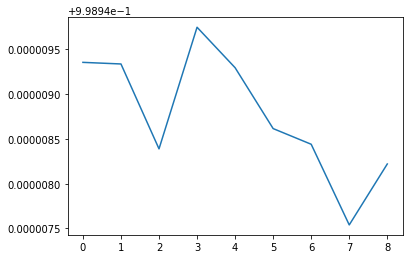

In [9]:
plt.plot(rsq[2:11])

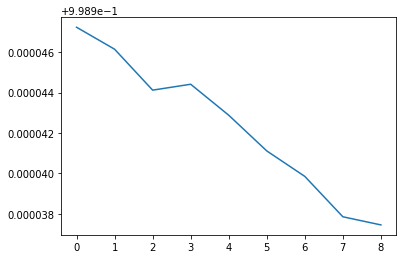

In [10]:
plt.plot(adj[2:11])

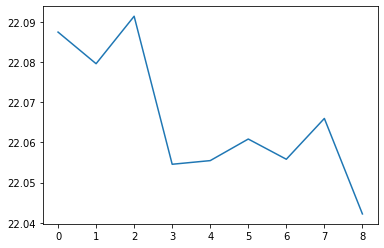

In [11]:
plt.plot(mse[2:11])

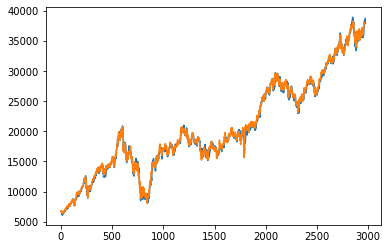

In [87]:
plt.plot(y)
plt.plot(y_pred)